In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

#Boston House Pricesのデータをロード
boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston['Price'] = boston.target #目的変数をデータフレームに追加

In [2]:
#boston_df

In [3]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


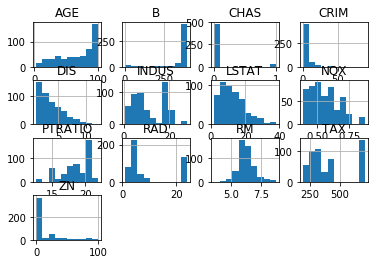

In [29]:
%matplotlib inline
boston_df.hist()
plt.show()

# RM + LSTAT or DIS or NOX がいいかも

In [27]:
#説明変数のデータフレーム（説明変数とRMとLSTATを利用）
df = pd.DataFrame()
#xl='RM'
#yl='LSTAT'
xl='RM'
yl='LSTAT'
df[xl] = boston_df[xl]
df[yl] = boston_df[yl]

X_multi = df
Y_target = boston.target

#モデル生成とフィッティング
lreg = LinearRegression()
lreg.fit(X_multi, Y_target)
a1, a2 = lreg.coef_ #係数
b = lreg.intercept_ #切片

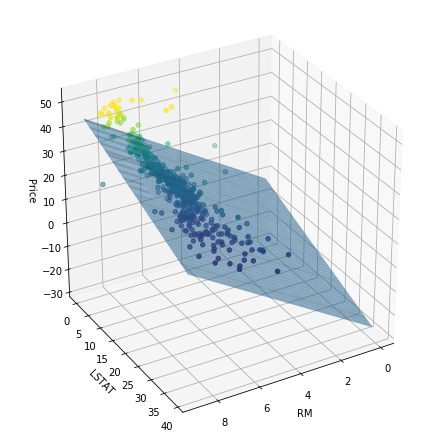

In [34]:
#%matplotlib nbagg
%matplotlib inline
#3D描画（実測値の描画）
x, y, z = np.array(df[xl]), np.array(df[yl]), np.array(Y_target)
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.scatter3D(np.ravel(x), np.ravel(y), np.ravel(z), c = list(z))

#3D描画（回帰平面の描画）
X, Y = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 40, 1))
Z = a1 * X + a2 * Y + b
ax.plot_surface(X, Y, Z, alpha = 0.5) #alphaで透明度を指定
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_zlabel("Price")

ax.view_init(30, 60)
plt.show()

Priceが高くなる方向は・・・<br>
・RM(average number of rooms per dwelling)が大きくなる<br>
・LSTAT(% lower status of the population)が小さくなる